<a href="https://colab.research.google.com/github/gahz8212/python/blob/master/%EB%86%8D%EA%B5%AC%ED%8F%AC%EC%A7%80%EC%85%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [29]:
df = pd.read_csv('/content/drive/MyDrive/csv/basketball_stat.csv', encoding='utf-8')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


Text(0.5, 1.0, 'STL and 2P')

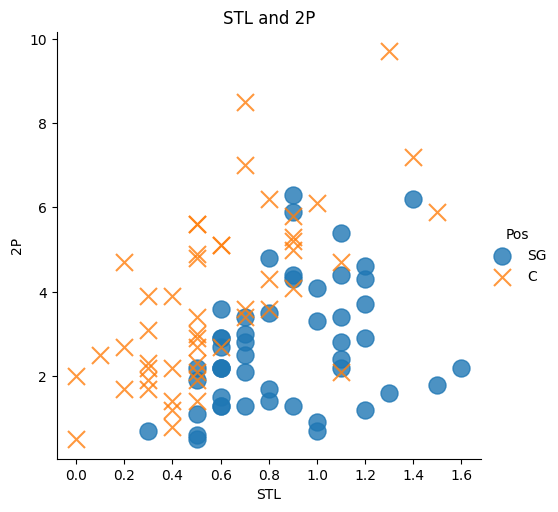

In [30]:
sns.lmplot(
    data=df,
    x='STL',
    y='2P',
    fit_reg=False,
    scatter_kws={'s': 150},
    markers=['o', 'x'],
    hue='Pos'
)
plt.title('STL and 2P')

Text(0.5, 1.0, 'AST and 2P')

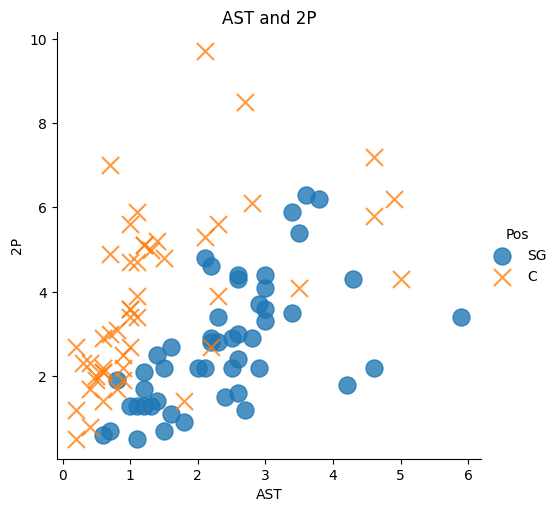

In [31]:
sns.lmplot(
    data=df,
    x='AST',
    y='2P',
    fit_reg=False,
    scatter_kws={'s': 150},
    markers=['o', 'x'],
    hue='Pos'
)
plt.title('AST and 2P')

Text(0.5, 1.0, 'STL and 2P')

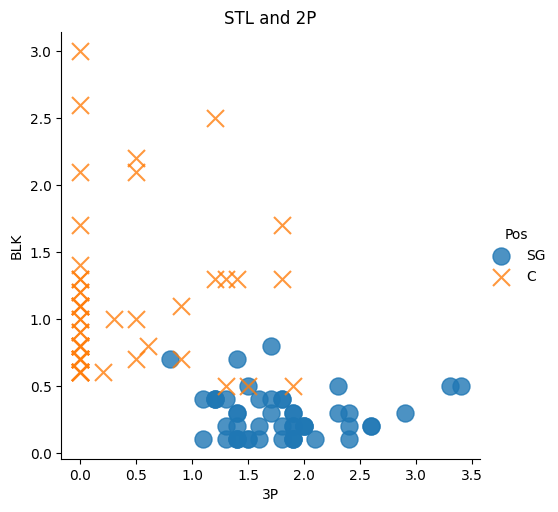

In [32]:
sns.lmplot(
    data=df,
    x='3P',
    y='BLK',
    fit_reg=False,
    scatter_kws={'s': 150},
    markers=['o', 'x'],
    hue='Pos'
)
plt.title('STL and 2P')

Text(0.5, 1.0, 'STL and 2P')

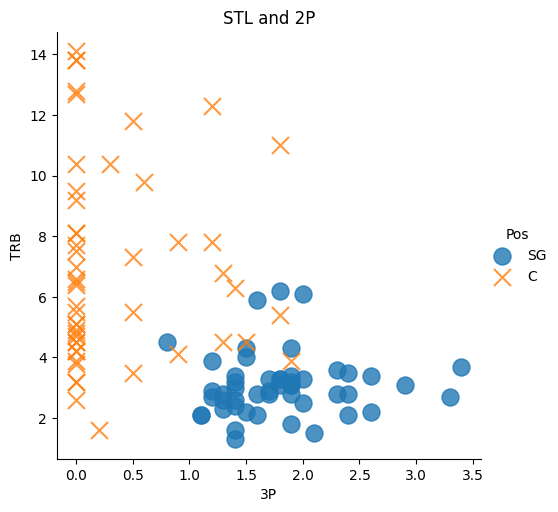

In [33]:
sns.lmplot(
    data=df,
    x='3P',
    y='TRB',
    fit_reg=False,
    scatter_kws={'s': 150},
    markers=['o', 'x'],
    hue='Pos'
)
plt.title('STL and 2P')

In [34]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [35]:
df.drop(['2P','AST','STL'],axis=1,inplace=True)

In [36]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    df.iloc[:, 2:], #문제(설명변수 3개, 인덱스 2~끝),
                                                    df.iloc[:, 1], #정답(종속변수 1개, target, 인덱스 1)
                                                    test_size=0.2,  #테스트 비율
                                                    random_state=42#랜덤 시드값
)

In [38]:
df.shape

(100, 5)

In [39]:
df.columns

Index(['Player', 'Pos', '3P', 'TRB', 'BLK'], dtype='object')

In [40]:
df[:3]

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6


In [41]:
X_train.shape,y_train.shape

((80, 3), (80,))

In [42]:
X_test.shape, y_test.shape

((20, 3), (20,))

In [43]:
X_train.index

Index([55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28, 93,  5, 66, 65,
       35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,  3, 17, 38,  8, 78,
        6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79, 41, 58, 48,
       98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1, 52, 21,  2, 23, 87, 91, 74,
       86, 82, 20, 60, 71, 14, 92, 51],
      dtype='int64')

In [44]:
X_test.index

Index([83, 53, 70, 45, 44, 39, 22, 80, 10, 0, 18, 30, 73, 33, 90, 4, 76, 77,
       12, 31],
      dtype='int64')

In [45]:
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
model_list = [knn, svm, dt]

In [51]:
scores=cross_val_score(knn,X_train,y_train,cv=5)

In [53]:
scores

array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ])

In [54]:
scores.mean()

np.float64(0.8875)

In [56]:
def print_cv(model,train,test,k):
  scores=cross_val_score(model,train,test,cv=5)
  print('\n*********************************************')
  print('----- 전체 모델 리스트 -----')
  print('----- 교차검증 결과 리스트 -----')
  mean_scores=np.mean(scores)
  print('----- 교차검증 결과 평균 -----')
  return scores,mean_scores

In [60]:
mean_sc_list=[]
for model in model_list:
  sc,mean_sc=print_cv(model,X_train,y_train,5)
  print('전체 정확도 리스트:',sc,'정확도 평균',mean_sc)
  print('-----------------------------------------------')
  mean_sc_list.append(mean_sc)


*********************************************
----- 전체 모델 리스트 -----
----- 교차검증 결과 리스트 -----
----- 교차검증 결과 평균 -----
전체 정확도 리스트: [0.9375 0.8125 0.8125 0.875  1.    ] 정확도 평균 0.8875
-----------------------------------------------

*********************************************
----- 전체 모델 리스트 -----
----- 교차검증 결과 리스트 -----
----- 교차검증 결과 평균 -----
전체 정확도 리스트: [0.875  0.875  0.8125 0.9375 1.    ] 정확도 평균 0.9
-----------------------------------------------

*********************************************
----- 전체 모델 리스트 -----
----- 교차검증 결과 리스트 -----
----- 교차검증 결과 평균 -----
전체 정확도 리스트: [0.9375 1.     0.875  0.875  1.    ] 정확도 평균 0.9375
-----------------------------------------------


In [61]:
mean_sc_list

[np.float64(0.8875), np.float64(0.9), np.float64(0.9375)]

(array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.8875, 0.8925, 0.8975, 0.9025, 0.9075, 0.9125, 0.9175, 0.9225,
        0.9275, 0.9325, 0.9375]),
 <BarContainer object of 10 artists>)

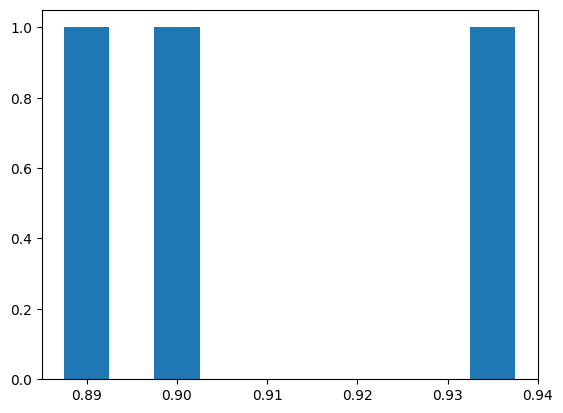

In [62]:
plt.hist(mean_sc_list)

In [46]:
model_list

[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [47]:
def print_cv(model, train, test, k):
    scores = cross_val_score(model, train, test, cv = k)
    print('-------교차검증(cv) 리스트 결과-------', scores)
    mean_scores = np.mean(scores)
    print('-------교차검증(cv) 평균 결과-------', mean_scores)
    return scores, mean_scores

    ## 함수의 결과로 여러개의 데이터를 return할 수 있다.
    ## 튜플로 묶어서 반환하게 된다.(scores, mean_scores)

In [52]:
model_names = ['NeighborsClassifier', 'SVC', 'DecisionTreeClassifier'] #[KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]
sc_list = []
mean_sc_list = []
for model in model_list:
    sc, mean_sc = print_cv(model, X_train, y_train, 5)
    sc_list.append(sc)
    mean_sc_list.append(mean_sc)

print('\n*********************************************')
print('----- 전체 모델 리스트 -----')
print(model_names)
print('----- 전체 모델의 교차검증 결과 리스트 -----')
print(sc_list)
print('----- 전체 모델의 교차검증 결과 평균 -----')
print(mean_sc_list)

-------교차검증(cv) 리스트 결과------- [0.9375 0.8125 0.8125 0.875  1.    ]
-------교차검증(cv) 평균 결과------- 0.8875
-------교차검증(cv) 리스트 결과------- [0.875  0.875  0.8125 0.9375 1.    ]
-------교차검증(cv) 평균 결과------- 0.9
-------교차검증(cv) 리스트 결과------- [0.9375 1.     0.875  0.875  1.    ]
-------교차검증(cv) 평균 결과------- 0.9375

*********************************************
----- 전체 모델 리스트 -----
['NeighborsClassifier', 'SVC', 'DecisionTreeClassifier']
----- 전체 모델의 교차검증 결과 리스트 -----
[array([0.9375, 0.8125, 0.8125, 0.875 , 1.    ]), array([0.875 , 0.875 , 0.8125, 0.9375, 1.    ]), array([0.9375, 1.    , 0.875 , 0.875 , 1.    ])]
----- 전체 모델의 교차검증 결과 평균 -----
[np.float64(0.8875), np.float64(0.9), np.float64(0.9375)]


In [63]:
params = { #하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4 * 3 * 2: 24개의 경우의 수
    'max_depth': [3, 5, 7, 10], #key : 하이퍼파라메터명, values는 list타입이어야 함.
    'random_state': [1, 3, 5],
    'criterion' : ['gini', 'entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준
}

In [64]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    ## gs_model는 최적의 파라메터가 적용된 모델의 객체!
    gs_model.fit(X_train, y_train)
    print(gs_model.best_estimator_) ## 최적의 파라메터가 적용된 모델 객체
    print(gs_model.best_score_) ## 최적의 파라메터가 적용된 모델로 학습한 정확도 결과(accuracy)
    print(gs_model.best_params_) ## 그리드 서치를 통해 찾은 최적의 파라메터
    print(gs_model) ## grid_search 객체

In [65]:
grid_search(dt, params, 5) #grid_search의 모든 경우의 수는 24 * 5

DecisionTreeClassifier(max_depth=3, random_state=1)
0.95
{'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})


In [66]:
## => 그리드 서치를 통해서 찾은
## => 최적의 파라메터는 {'criterion': 'gini', 'max_depth': 3, 'random_state': 1}
## 최적의 하이퍼 파라메터로 모델 객체 생성
## fit()
dt_gs = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [67]:
## 테스트 데이터로 검증해보자!
predict_result = None
def test_validation(model, X_test, y_test):
    global predict_result
    predict_result = model.predict(X_test)
    print(predict_result)
    acc = accuracy_score(y_test, predict_result )
    print('accuracy >> ', acc)
    cf = confusion_matrix(y_test, predict_result)
    # 실제(c)--> 예측(c, sg), 실제(sg)--> 예측(sg, c),
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지!
    # 4가지를 표형태로 정리해주는 것이 confusion_matrix
    # 첫번째 행/열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정!
    print('confusion matrix >> \n', cf)
    ## confusion matrix는 binary classfication인 경우에는 보기가 괜찮으나,
    ## multi class classification인 경우에는 보기가 힘들다.
    ## confusion matrix를 가독성 좋게 볼 수 있는 것이 classification_report
    c_report = classification_report(y_test, predict_result)
    print('classification report >> \n', c_report)

In [68]:
y_test.value_counts()

,count
Pos,
C,10
SG,10


In [69]:

test_validation(dt_gs, X_test, y_test)

['C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C'
 'SG' 'C' 'SG' 'C']
accuracy >>  0.95
confusion matrix >> 
 [[10  0]
 [ 1  9]]
classification report >> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [70]:
## c는 10개를 다 맞춤. sg는 9개를 맞추고, 1개를 c로 예측함(틀림)
## 정확도가 95%가 나왔음.
## acc = 10 + 9/ 10 + 9 + 1
## 정확도 =
##               실제C:예측C + 실제SG:실제SG /
##               실제C:예측C + 실제SG:실제SG + 실제C:예측SG + 실제SG예측C
test_validation(dt_gs, X_test, y_test)

['C' 'C' 'SG' 'SG' 'C' 'SG' 'SG' 'SG' 'C' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C'
 'SG' 'C' 'SG' 'C']
accuracy >>  0.95
confusion matrix >> 
 [[10  0]
 [ 1  9]]
classification report >> 
               precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

